In [527]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [542]:
# Comment out and in methods to be plotted.

data_locations = {
    # "serial": "../serial_code/results.csv",
    # "numba": "../numba_code/results.csv",
    # "cython": "../cython_code/results.csv",
    # "numpy": "../numpy_code/results.csv",
    "openmp_1": "../openmp_code/results1.csv",
    "openmp_2": "../openmp_code/results2.csv",
    "openmp_3": "../openmp_code/results3.csv",
    "openmp_4": "../openmp_code/results4.csv",
    # 
    # 
    # "mpi4py_1": "../mpi4pi_code/results1.csv",
    # "mpi4py_2": "../mpi4pi_code/results2.csv",
    # "mpi4py_3": "../mpi4pi_code/results3.csv",
    # 
    # 
    # "numpyXcython": "../numpyXcython_code/results.csv",
    # "numpyXmpi4py": "../numpyXmpi4pi/results.csv",
}

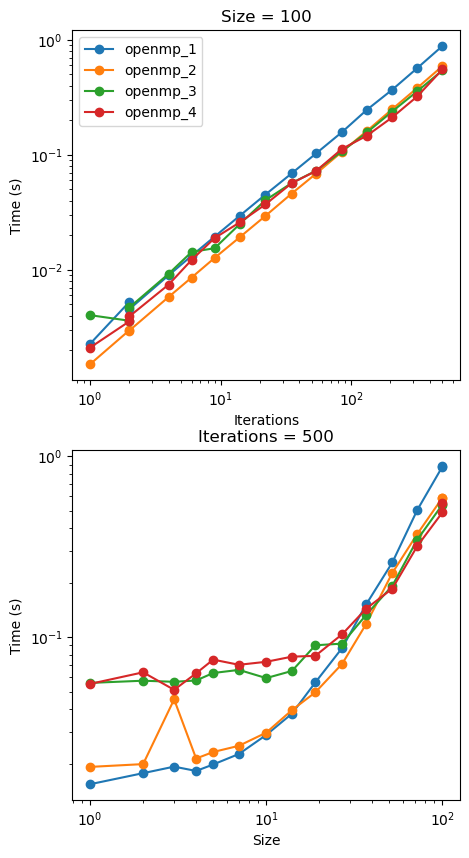

In [545]:
timeplots = []
sizeplots = []


for path in data_locations.values():
    df = pd.read_csv(path)
    df_te = df[15:]
    df_ts = df[1:]
    timeplots.append(df_te[df_te["size"] == 100])
    sizeplots.append(df_ts[df_ts["iterations"] == 500])

fig, ax = plt.subplots(2, 1, figsize=(5,10))

i=0
for df in timeplots:
    ax[0].plot(df["iterations"], df["time"], marker='o', linestyle='-', label=list(data_locations.keys())[i])
    i+=1
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Time (s)")
ax[0].set_title("Size = 100")

i=0
for df in sizeplots:
    ax[1].plot(df["size"], df["time"], marker='o', linestyle='-', label=list(data_locations.keys())[i])
    i+=1
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_xlabel("Size")
ax[1].set_ylabel("Time (s)")
ax[1].set_title("Iterations = 500")

ax[0].legend()

plt.savefig("figure_6.png", bbox_inches="tight")

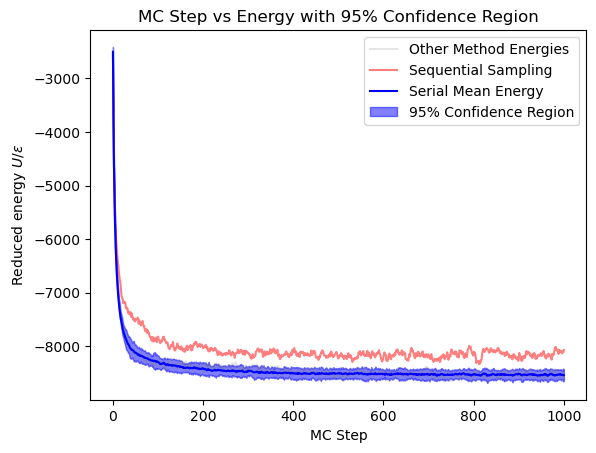

In [532]:
df_serial_plots = []
for i in range(20):
    df = pd.read_csv(
        f"serial_plot{i+1}.txt",
        delim_whitespace=True,
        skiprows=9,
        names=["MC step", "Ratio", "Energy", "Order"]
    )
    df_serial_plots.append(df)

df_other_plots = []
for path in data_locations.keys():
    if path == "serial":
        None
    else:
        df = pd.read_csv(
            f"{path}_plot.txt",
            delim_whitespace=True,
            skiprows=9,
            names=["MC step", "Ratio", "Energy", "Order"]
        )
        df_other_plots.append(df)

df_serial_plots_combined = pd.concat(df_serial_plots, axis=1)

energy_data = df_serial_plots_combined["Energy"]

mean_e = energy_data.mean(axis=1)
std_e = energy_data.std(axis=1)

# Assuming a confidence interval of 95% and a normal distribution of data
upper_bound = mean_e + 1.96 * std_e
lower_bound = mean_e - 1.96 * std_e

fig, ax = plt.subplots()

for i in range(len(df_other_plots)):
    if i == 1:
        plt.plot(df_other_plots[i].iloc[:,0],df_other_plots[i].iloc[:,2], label="Other Method Energies", color='grey', alpha=0.2)
    elif i == 2:
        plt.plot(df_other_plots[i].iloc[:,0],df_other_plots[i].iloc[:,2], label="Sequential Sampling", alpha=0.5, color = "red")
    elif i == 10 or i == 11:
        plt.plot(df_other_plots[i].iloc[:,0],df_other_plots[i].iloc[:,2], alpha=0.5, color="red")
    else:
        plt.plot(df_other_plots[i].iloc[:,0],df_other_plots[i].iloc[:,2], color='grey', alpha=0.2)

plt.plot(df_serial_plots[0].iloc[:,0], mean_e, label='Serial Mean Energy', color='blue')

plt.fill_between(df_serial_plots_combined.iloc[:,0], lower_bound, upper_bound, color='blue', alpha=0.5, label='95% Confidence Region')
plt.xlabel('MC Step')
plt.ylabel('Reduced energy $U / \\varepsilon$')
plt.title('MC Step vs Energy with 95% Confidence Region')
plt.legend()
plt.grid(False)

plt.savefig("figure_1.png", bbox_inches="tight")
plt.show()

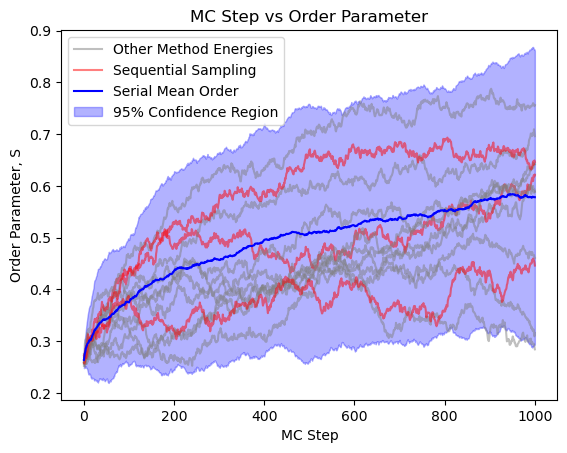

In [426]:
order_data = df_serial_plots_combined["Order"]

mean_o = order_data.mean(axis=1)
std_o = order_data.std(axis=1)

# Assuming a confidence interval of 95% and a normal distribution of data
upper_bound = mean_o + 1.96 * std_o
lower_bound = mean_o - 1.96 * std_o

fig, ax = plt.subplots()

for i in range(len(df_other_plots)):
    if i == 1:
        plt.plot(df_other_plots[i].iloc[:,0],df_other_plots[i].iloc[:,3], label="Other Method Energies", color='grey', alpha=0.5)
    elif i == 2:
        plt.plot(df_other_plots[i].iloc[:,0],df_other_plots[i].iloc[:,3], label="Sequential Sampling", alpha=0.5, color = "red")
    elif i == 10 or i == 11:
        plt.plot(df_other_plots[i].iloc[:,0],df_other_plots[i].iloc[:,3], alpha=0.5, color="red")
    else:
        plt.plot(df_other_plots[i].iloc[:,0],df_other_plots[i].iloc[:,3], color='grey', alpha=0.5)

plt.plot(df_serial_plots[0].iloc[:,0], mean_o, label='Serial Mean Order', color='blue')

plt.fill_between(df_serial_plots_combined.iloc[:,0], lower_bound, upper_bound, color='blue', alpha=0.3, label='95% Confidence Region')
plt.xlabel('MC Step')
plt.ylabel('Order Parameter, S')
plt.title('MC Step vs Order Parameter')
plt.legend()
plt.grid(False)

plt.savefig("figure_2.png")
plt.show()


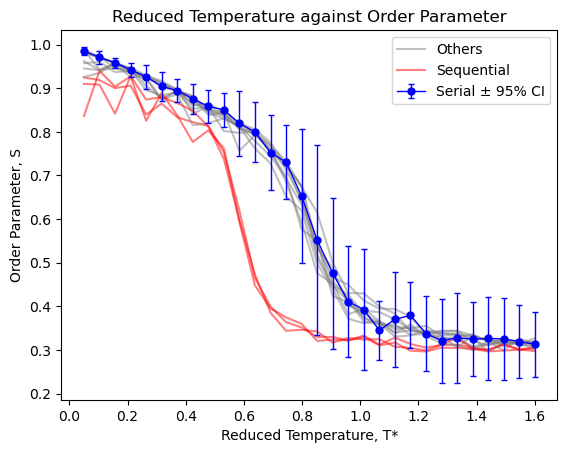

In [427]:
df_serial_temps = pd.read_csv(
    f"serial_temp.txt",
    skiprows=1,
    names=["Temperature", "Order"]
)

grouped = df_serial_temps.groupby("Temperature")["Order"]
mean_t = grouped.mean()
count_t = grouped.count()
std_t = grouped.std()

upper_bound = mean_t + 1.96 * std_t
lower_bound = mean_t - 1.96 * std_t

df_other_temps = []
for path in data_locations.keys():
    if path == "serial":
        None
    else:
        df = pd.read_csv(
            f"{path}_temp.txt",
            skiprows=1,
            names=["Temperature", "Order"]
        )
        df_other_temps.append(df)

fig, ax = plt.subplots()

for i in range(len(df_other_plots)):
    if i == 0:
        plt.plot(df_other_temps[i].iloc[:30,0], df_other_temps[i].groupby("Temperature")["Order"].mean(), label='Others', color='grey', alpha=0.5)
    elif i == 2:
        plt.plot(df_other_temps[i].iloc[:30,0], df_other_temps[i].groupby("Temperature")["Order"].mean(), label='Sequential', color='red', alpha=0.5)
    elif i == 10 or i == 11:
        plt.plot(df_other_temps[i].iloc[:30,0], df_other_temps[i].groupby("Temperature")["Order"].mean(), color='red', alpha=0.5)
    else:
        plt.plot(df_other_temps[i].iloc[:30,0], df_other_temps[i].groupby("Temperature")["Order"].mean(), color='grey', alpha=0.5)

plt.errorbar(df_serial_temps.iloc[:30, 0], mean_t, yerr=[mean_t - lower_bound, upper_bound - mean_t], fmt='o-', color='blue', linewidth=1, ms=5, ecolor='blue', elinewidth=1, capsize=2, label='Serial ± 95% CI')

plt.xlabel('Reduced Temperature, T*')
plt.ylabel('Order Parameter, S')
plt.title('Reduced Temperature against Order Parameter')
plt.legend()
plt.grid(False)

plt.savefig("figure_3.png")
plt.show()